# CSE152B - Spring 2022: Homework 1
## Computing Resources

You should be assigned an account that has access to GPU clusters on https://datahub.ucsd.edu/. Steps to set up the environment:
- Login with your UCSD credentials;
- Launch a GPU instance with (1 GPU, 8 CPU, 16G RAM). This will lead you to a Jupyter Notebook GUI, where you can browse files, launch a terminal with bash environment via (upper-right) New -> Terminal.
- You can also access the container with command line from your local terminal:
    - `ssh {your ucsd id}@dsmlp-login.ucsd.edu` # use your UCSD credentials
    - get active container via `kubectl get pods`
    - attach to the pod via `kubesh {pod name you got from above}`
    - then you will be in the bash environment inside the container, identical to the terminal launched from Jupyter Notebook.
    
## Prepare the notebook and codes
Once you are in the bash environment from the terminal, pull the code for HW1 by:

```bash
cd ~
git clone --recurse-submodules -j8 https://github.com/ViLab-UCSD/cse152b-hw1-release-sp22.git
cd cse152b-hw1-release-sp22
cd pytorch-superpoint/datasets
ln -s /datasets/cs152b-sp22-a00-public/hpatches-sequences-release/ HPatches # map the public dataset to your location
cd ..
```

Then prepare the environment only for the first time:
```bash
conda init bash # initialize the enviroment
source ~/.bashrc
```

Everytime using the terminal (newly launched/reconnected), run this so that you have access to all the packages:
```bash
conda activate /datasets/cs152b-sp22-a00-public/envs/py38-sp # activate the enviroment
```

If it runs successfully, you will see prefix `(py38-sp)` in your current line as highlighted:

![](images/conda.png)

## Submission Instructions
1. Attempt all questions.
2. Please comment all your code adequately.
3. Include all relevant information such as text answers, output images in notebook.
4. **Academic integrity:** The homework must be completed individually.

5. **Submission instructions:**  
 (a) Submit the notebook and its PDF version on Gradescope, via:
     - Option 1: Ctrl + P -> Save as PDF (toggling Headers and footers, Background graphics)
     
 (b) Rename your submission files as Lastname_Firstname.ipynb and Lastname_Firstname.pdf.  
 (c) Correctly select pages for each answer (only your answers; excluding the problem description text) on Gradescope to allow proper grading.

6. **Due date:** Assignments are due Fri, Apr 22, by 11pm PST.

# Question 1: SuperPoint [1](http://openaccess.thecvf.com/content_cvpr_2018_workshops/papers/w9/DeTone_SuperPoint_Self-Supervised_Interest_CVPR_2018_paper.pdf)

In this question we will look at the method SuperPoint [1], for establishing correspondences between a pair of images. Similar to UCN [2] which was discussed in the lectures, SuperPoint is a deep network to learn descriptors. However, SuperPoint simultaneously learns an interest point detector. In this question, you will generalize your understanding from the lectures to learn about SuperPoint, answer a few conceptual questions, test SuperPoint with pretrained models and observe the results.

In this question we will be using implementation of SuperPoint from a public repo (https://github.com/eric-yyjau/pytorch-superpoint).

**Note**: All paths in this question are relative to *./pytorch-superpoint/*. All scripts/commands should be run from that path in the terminal (by first ``cd pytorch-superpoint/``).

## Q1.1: Overall pipeline
The overall pipeline of SuperPoint is given in Fig. 3 of the paper. Please read Section 3 with a focus on Section 3.1 and 3.2 and answer:

(a) Why does SuperPoint use a shared encoder for interest point detection (Interest Point Decoder) and description (Descriptor Decoder)? (3 points)

`write your answer here`

==== SOLUTION ====

To share **computation** and **representation** across the two tasks, to reduce the need for computing two feature embeddings, and to potentially make the two tasks (detection and description) mututlaly beneficial by inferring from the same feature embedding.

(b) What is the motivation for the output shape of Interest Point Decoder being  $H/8 \times W/8 \times 64$, instead of directly outputting an $H \times W$ heatmap from the last layer of the CNN-based decoder? (3 points)

`write your answer here`

==== SOLUTION ====

To avoid using techniques like **upsampling** or deconvolution to get back to the full resolution, which are **computationally expensive**, while still be able to estimate a per-pixel detection probability map.

## Q1.2: MagicPoint

The training pipeline is described in Section 4 and 5. In Section 4, the detector part is *trained on synthetic images dataset* with pre-defined interest points, in a fully supervised fashion. The resulting interest point detector is named **MagicPoint**. You will run inference for **MagicPoint** with model weights pretrained on synthetic images.

First, make sure the pretrained model in *configs/magicpoint_repeatability_heatmap.yaml* is:

```bash
pretrained: 'logs/magicpoint_synth_t2/checkpoints/superPointNet_100000_checkpoint.pth.tar'
```

Run the following code in your terminal to run the inference over 100 images from HPatches dataset and export the results, following the experiment setup in Section 7:

```bash
python export.py export_descriptor  configs/magicpoint_repeatability_heatmap.yaml magicpoint_syn_TEST_hpatches
```

Results are saved to: *logs/magicpoint_syn_TEST_hpatches/predictions/{%d}.npz*

Then, run the evaluation script to load the exported results and compute various metrics:

```bash
python evaluation.py logs/magicpoint_syn_TEST_hpatches/predictions --repeatibility --outputImg --homography --plotMatching
```

The following metrics will be printed out at the end of the run, similar to what is measured in Table 4 and explained in detail in Appendix A:

- Detector metrics:
    - Rep. (repeatability)
    - MLE (localization error)
- Descriptor metrics:
    - NN mAP (mean AP)
    - M. score (matching score)
- Homography accuracy under varying thresholds of pixel offsets (correctness_ave)

Please read the paper for detailed description of the metrics. Visualizations of interest points detected for a pair of images are saved to *logs/magicpoint_syn_TEST_hpatches/predictions/repeatibility/{%d}m.png*. 

### **Please answer:**

(a) Report the 4 metrics given above from the run. (2 points)

`write your answer here`

==== SOLUTION ====

Rep. (repeatability): 0.4640245527593945

MLE (localization error): 1.2420950651301461

NN mAP (mean AP): 0.6559602866139881

M. score (matching score): 0.30686604507666576

homography estimation threshold [1, 3, 5, 10, 20, 50]
correctness_ave [0.33 0.61 0.67 0.72 0.73 0.78]

(b) Please explain: what is repeatibility? (3 points)

`write your answer here`

==== SOLUTION ====

On a high level, the probability that a point is detected in the second image. Or math in Equ 14 of Appendix.

(c) Report detection visualizations for samples 2 and 5 by **MagicPoint** in the Markdown block below. (2 points)

``change the paths and run the block to display the images``

==== SOLUTION ====

![](pytorch-superpoint/logs/magicpoint_syn_TEST_hpatches/pedictions/repeatibility3/2.png)
![](pytorch-superpoint/logs/magicpoint_syn_TEST_hpatches/pedictions/repeatibility3/5.png)

Then, you will use **SIFT** and **Harris corner detector** to run interest point detection on the same set of images:

```bash
python export_classical.py export_descriptor configs/classical_descriptors.yaml sift_TEST_hpatches --correspondence

python evaluation.py logs/sift_TEST_hpatches/predictions --sift --repeatibility --outputImg --homography --plotMatching
```

Visualizations of interest points detected for a pair of images are saved to *logs/sift_TEST_hpatches/predictions/repeatibility3/{%d}_{HARRIS, SIFT}.png*. 

### **Please answer:**

(d) Report the detection metrics (**repeatability** and **localization error**) from Harris detector from the above run. (2 points)

`write your answer here`

==== SOLUTION ====

[HARRIS] repeatability:  0.4608956991379914

[HARRIS] localization error over  100  images:  1.1676927435398259

(e) Report detection visualizations from samples 2 and 5 by **Harris detector** in the Markdown block below. (2 points)

`change the paths and run the block to display the images`

==== SOLUTION ====

![](pytorch-superpoint/logs/sift_TEST_hpatches/pedictions/repeatibility3/2_HARRIS.png)
![](pytorch-superpoint/logs/sift_TEST_hpatches/pedictions/repeatibility3/5_HARRIS.png)

(f) Does **MagicPoint** perform better than **Harris detector**? Explain why or why not. (5 points)

`write your answer here`

==== SOLUTION ====

Comparable repeatibility (MP 0.464 VS Harris 0.460), but harris has better localization (MP 1.242 VS Harris 1.167). Possible reasons include: Harris is a more specialized hand-crafted corner detector while MP which is trained on simple synthetic data only, may suffer from domain gap.

## Q1.3: Homographic Adaptation and SuperPoint

**MagicPoint** is trained with full supervision on synthetic dataset, where interest points are defined as mostly corners of simple geometric primitatives (Fig. 4). However as a base detector, MagicPoint will not generalize well to natural images (e.g. HPatches) because of domain gap. As a result, Homographic Adaptation is proposed (see Section 5) to create pseudo-ground truth interest points on real images, and use them to finetune MagicPoint on real images in a self-supervised paradigm. The finetuned detector is named **SuperPoint**. In this question, you will run inference of SuperPoint on HPatches, which is trained on COCO dataset.

You will use the same script to run inference, except that using SuperPoint finetuned on COCO instead of MagicPoint trained on synthetic images dataset.

First, change the pretrained model in *configs/magicpoint_repeatability_heatmap.yaml* via:

```bash
pretrained: 'logs/magicpoint_synth_t2/checkpoints/superPointNet_100000_checkpoint.pth.tar'
```
`==change to==>`
```bash
pretrained: 'logs/superpoint_coco_heat2_0/checkpoints/superPointNet_170000_checkpoint.pth.tar'
```

Then run inference via:

```bash
python export.py export_descriptor  configs/magicpoint_repeatability_heatmap.yaml superpoint_coco_TEST_hpatches

python evaluation.py logs/superpoint_coco_TEST_hpatches/predictions --repeatibility --outputImg --homography --plotMatching
```

results are saved to: *logs/superpoint_coco_TEST_hpatches/predictions*

### Please answer:

(a) Report the detection metrics (**repeatability** and **localization error**) from **SuperPoint** from the above run. (2 points)

`write your answer here`

==== SOLUTION ====

repeatability:  0.6717886842715265

localization error over  100  images :  1.033268010230037

(b) Does **SuperPoint** perform better than **MagicPoint** and **Harris detector**? Explain why or why not. (5 points)

`write your answer here`

==== SOLUTION ====

Yes SP is better at both metrics: SP is finetuned on real images with **HA** which reduces **domain gap**.

The descriptor is measured via descriptor metrics (**NN mAP** and **M. score**, see Section 7.3 and Appendix A)*.*  Additionally, detector and descriptor can be jointly evaluated via homography estimation, by computing homography from estimated correspondences, and measuring the average error of pixel offsets using the homography (see Appendix A).

(c) Report and compare SuperPoint and SIFT on **NN mAP**, **M. score** and **Homography accuracy under varying thresholds**. (3 points)

`write your answer here`

==== SOLUTION ====

SP:

homography estimation threshold [1, 3, 5, 10, 20, 50]

correctness_ave [0.44 0.77 0.82 0.91 0.92 0.94]

matching score 0.44657564169598385

mean AP 0.7746076818127158

SIFT:

[SIFT] homography estimation threshold [1, 3, 5, 10, 20, 50]

[SIFT] correctness_ave [0.67 0.82 0.86 0.87 0.91 0.93]

[SIFT] matching score 0.2518513226143951

[SIFT] mean AP 0.7011537864860393


(d) Does SuperPoint perform better than SIFT on **Homography accuracy** for lower thresholds? Explain why or why not. (5 points)

`write your answer here`

==== SOLUTION ====

SP is worse on small thresholds, due to **subpixel accuracy** of localization by SIFT, while SP is not specifically designed to achieve this. Moreover localization accuracy of SP may suffer from domain gap, which is inherent to learnable methods.

## Q1.4 Try SuperPoint on your own image pairs
In this question you are encouraged to try your own image pairs which have reasonable overlap of contents between two images. A sample image pair is given in *configs/magicpoint_repeatability_heatmap_your_images.yaml → `data[’im_path1']`, `data[’im_path2’]`*

Please first run the following code to estimate and visualize correspondences of the sample pair from KITTI dataset. Visualization will be saved at *logs/superpoint_coco_TEST_yours/predictions/matching/0m.png*. If everything goes well, the image should look like:

![](images/0m.png)

Next, please change the image pair paths to a pair taken by yourself (under the assumption that reasonable amount of correspondences can be visually identified; also format has to be .jpg or .png). Also adjust the resize flag `data['preprocessing']['resize']` to be values propotional to your image aspect ratio and a size that fits into the gpu. You are also encourage to tweak the viaualization parameters of ratio/max number of all matches (variables `ratio_max` and `matches_max`) to make the visualization look good with reasonable amount of matches that is not too clustered.

```bash
python export.py export_descriptor  configs/magicpoint_repeatability_heatmap_your_images.yaml superpoint_coco_TEST_yours

python evaluation.py logs/superpoint_coco_TEST_yours/predictions --outputImg --plotMatchingOnly
```

(a) Report your visualizations below. (3 points)

``change the paths and run the block to display the image``
![](pytorch-superpoint/logs/superpoint_coco_TEST_yours/predictions/matching/0m.png)

(b) **Bonus:** You are encouraged to take a second pair where it is more ‘difficult’ to establish abundant correspondences than the first set above. Explain how you created a scenario where correspondence is more challenging. Report the results again and explain your observation on the differences between results for the two pairs of images. (5 points)

``change the paths and run the block to display the other image``
![](pytorch-superpoint/logs/superpoint_coco_TEST_yours/predictions/matching/0m.png)

`write your answer here`

# Q2: Metric Learning for Fashion Images Retrival

In this problem you will train a CNN for learning embeddings for fashion images (e.g. clothing, shoes) with techniques from metric learning (e.g. Triplet loss, hard negative mining, distance functions). Once the network is trained, you will observe the application on similar image retrival, and evaluate design choices of the model.

## Q2.1: Train a simple CNN and observe training and evaluations.

Run the following code within the notebook, which includes a full pipeline of learning embeddings for fashion images. By default the model will train for 2 epochs (i.e. twice over all training samples), with cosine similarity as distance function for embeddings, triplet margin loss as discussed in lectures, and semi-hard negative mining strategy. After each epoch, the pipeline will evaluate on a held-out test set to measure the accuracy with [`accuracy_calculator.get_accuracy`](https://kevinmusgrave.github.io/pytorch-metric-learning/accuracy_calculation/).

Run the following pipeline, and answer the questions below.

In [2]:
!pip install pytorch-metric-learning
!pip install faiss-gpu

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms

from pytorch_metric_learning import distances, losses, miners, reducers, testers
from pytorch_metric_learning.utils.accuracy_calculator import AccuracyCalculator
from pytorch_metric_learning.distances import CosineSimilarity
from pytorch_metric_learning.utils import common_functions as c_f
from pytorch_metric_learning.utils.inference import InferenceModel, MatchFinder

import matplotlib.pyplot as plt
import numpy as np

In [11]:

### Define a network architecture ###
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(9216, 128)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        # print(x.shape) # should be [batch_size, 9216]
        x = self.fc1(x)
        return x
    
class Net_small(nn.Module):
    def __init__(self):
        super(Net_small, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(1352, 128)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
#         print(x.shape)
        x = self.fc1(x)
        return x


### Do the training ###
def train(model, loss_func, mining_func, device, train_loader, optimizer, epoch):
    model.train()
    loss_list = []
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()
        embeddings = model(data)
        indices_tuple = mining_func(embeddings, labels)
        loss = loss_func(embeddings, labels, indices_tuple)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(
                "Epoch {} Iteration {}: Loss = {}, Number of mined triplets = {}".format(
                    epoch, batch_idx, loss, mining_func.num_triplets
                )
            )
        loss_list.append(loss.item())
    return loss_list


### convenient function from pytorch-metric-learning ###
def get_all_embeddings(dataset, model):
    tester = testers.BaseTester()
    return tester.get_all_embeddings(dataset, model)


### compute accuracy using AccuracyCalculator from pytorch-metric-learning ###
def test(train_set, test_set, model, accuracy_calculator):
    train_embeddings, train_labels = get_all_embeddings(train_set, model)
    test_embeddings, test_labels = get_all_embeddings(test_set, model)
    test_labels
    train_labels = train_labels.squeeze(1)
    test_labels = test_labels.squeeze(1)
    print("Computing accuracy")
    accuracies = accuracy_calculator.get_accuracy(
        test_embeddings, train_embeddings, test_labels, train_labels, False
    )
    print("Test set accuracy (Precision@1) = {:f}".format(accuracies["precision_at_1"]))
    return accuracies, test_labels


device = torch.device("cuda")

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

batch_size = 256

dataset1 = datasets.FashionMNIST(".", train=True, download=True, transform=transform)
dataset2 = datasets.FashionMNIST(".", train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=256)

model = Net().to(device)
# model = Net_small().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 20


### pytorch-metric-learning stuff ###
distance = distances.CosineSimilarity()
#distance = distances.LpDistance()
reducer = reducers.ThresholdReducer(low=0)

margin_num = 0.2
# margin_num = 10
loss_func = losses.TripletMarginLoss(margin=margin_num, distance=distance, reducer=reducer)
#loss_func = losses.ContrastiveLoss()
#loss_func = losses.ArcFaceLoss(num_classes = 10, embedding_size = 128)
mining_func = miners.TripletMarginMiner(
#     margin=margin_num, distance=distance, type_of_triplets="semihard"
    margin=margin_num, distance=distance, type_of_triplets="hard"
)


accuracy_calculator = AccuracyCalculator(include=("precision_at_1",), k=1)
### pytorch-metric-learning stuff ###


loss_list_all = []
accuracies_list = []
accuracies, test_labels = test(dataset1, dataset2, model, accuracy_calculator)
accuracies_list.append((0, accuracies))

for epoch in range(1, num_epochs + 1):
    loss_list = train(model, loss_func, mining_func, device, train_loader, optimizer, epoch)
    accuracies = test(dataset1, dataset2, model, accuracy_calculator)
    loss_list_all += loss_list
    accuracies_list.append((len(loss_list_all), accuracies[0]))

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 143.91it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.847900
Epoch 1 Iteration 0: Loss = 0.28699153661727905, Number of mined triplets = 347760
Epoch 1 Iteration 20: Loss = 0.2008829265832901, Number of mined triplets = 296095
Epoch 1 Iteration 40: Loss = 0.2007526308298111, Number of mined triplets = 249773
Epoch 1 Iteration 60: Loss = 0.20036014914512634, Number of mined triplets = 208833
Epoch 1 Iteration 80: Loss = 0.20030681788921356, Number of mined triplets = 202947
Epoch 1 Iteration 100: Loss = 0.20020116865634918, Number of mined triplets = 252587
Epoch 1 Iteration 120: Loss = 0.20013222098350525, Number of mined triplets = 151879
Epoch 1 Iteration 140: Loss = 0.20011185109615326, Number of mined triplets = 209879
Epoch 1 Iteration 160: Loss = 0.20009128749370575, Number of mined triplets = 176202
Epoch 1 Iteration 180: Loss = 0.20008225739002228, Number of mined triplets = 163180
Epoch 1 Iteration 200: Loss = 0.20005065202713013, Number of mined triplets = 129107
Epoch 1 Ite

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 160.97it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.831000
Epoch 2 Iteration 0: Loss = 0.20004455745220184, Number of mined triplets = 157673
Epoch 2 Iteration 20: Loss = 0.2000412493944168, Number of mined triplets = 146416
Epoch 2 Iteration 40: Loss = 0.20004448294639587, Number of mined triplets = 142481
Epoch 2 Iteration 60: Loss = 0.20002762973308563, Number of mined triplets = 137908
Epoch 2 Iteration 80: Loss = 0.20002660155296326, Number of mined triplets = 132069
Epoch 2 Iteration 100: Loss = 0.20002657175064087, Number of mined triplets = 156677
Epoch 2 Iteration 120: Loss = 0.20002806186676025, Number of mined triplets = 140771
Epoch 2 Iteration 140: Loss = 0.2000197470188141, Number of mined triplets = 152240
Epoch 2 Iteration 160: Loss = 0.20001830160617828, Number of mined triplets = 154753
Epoch 2 Iteration 180: Loss = 0.20001721382141113, Number of mined triplets = 139578
Epoch 2 Iteration 200: Loss = 0.20001624524593353, Number of mined triplets = 134178
Epoch 2 Ite

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 157.59it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.836000
Epoch 3 Iteration 0: Loss = 0.20001493394374847, Number of mined triplets = 124696
Epoch 3 Iteration 20: Loss = 0.2000131458044052, Number of mined triplets = 144847
Epoch 3 Iteration 40: Loss = 0.20000988245010376, Number of mined triplets = 147613
Epoch 3 Iteration 60: Loss = 0.2000112533569336, Number of mined triplets = 144380
Epoch 3 Iteration 80: Loss = 0.2000119388103485, Number of mined triplets = 150685
Epoch 3 Iteration 100: Loss = 0.2000102996826172, Number of mined triplets = 148345
Epoch 3 Iteration 120: Loss = 0.2000085413455963, Number of mined triplets = 159872
Epoch 3 Iteration 140: Loss = 0.2000085711479187, Number of mined triplets = 150452
Epoch 3 Iteration 160: Loss = 0.2000071108341217, Number of mined triplets = 153003
Epoch 3 Iteration 180: Loss = 0.2000081092119217, Number of mined triplets = 123136
Epoch 3 Iteration 200: Loss = 0.2000078409910202, Number of mined triplets = 118234
Epoch 3 Iteration 

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 183.91it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.834100
Epoch 4 Iteration 0: Loss = 0.2000063955783844, Number of mined triplets = 134503
Epoch 4 Iteration 20: Loss = 0.2000061720609665, Number of mined triplets = 139677
Epoch 4 Iteration 40: Loss = 0.20000864565372467, Number of mined triplets = 132690
Epoch 4 Iteration 60: Loss = 0.20000597834587097, Number of mined triplets = 138768
Epoch 4 Iteration 80: Loss = 0.20000499486923218, Number of mined triplets = 141160
Epoch 4 Iteration 100: Loss = 0.2000056803226471, Number of mined triplets = 190637
Epoch 4 Iteration 120: Loss = 0.20000481605529785, Number of mined triplets = 129734
Epoch 4 Iteration 140: Loss = 0.20000410079956055, Number of mined triplets = 137517
Epoch 4 Iteration 160: Loss = 0.20000462234020233, Number of mined triplets = 156320
Epoch 4 Iteration 180: Loss = 0.20000414550304413, Number of mined triplets = 162310
Epoch 4 Iteration 200: Loss = 0.200004443526268, Number of mined triplets = 160359
Epoch 4 Iterat

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 149.51it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.830100
Epoch 5 Iteration 0: Loss = 0.20000366866588593, Number of mined triplets = 115206
Epoch 5 Iteration 20: Loss = 0.20000380277633667, Number of mined triplets = 120268
Epoch 5 Iteration 40: Loss = 0.2000032365322113, Number of mined triplets = 116372
Epoch 5 Iteration 60: Loss = 0.20000387728214264, Number of mined triplets = 176457
Epoch 5 Iteration 80: Loss = 0.20000265538692474, Number of mined triplets = 172767
Epoch 5 Iteration 100: Loss = 0.20000270009040833, Number of mined triplets = 124052
Epoch 5 Iteration 120: Loss = 0.20000238716602325, Number of mined triplets = 113642
Epoch 5 Iteration 140: Loss = 0.20000271499156952, Number of mined triplets = 146686
Epoch 5 Iteration 160: Loss = 0.20000331103801727, Number of mined triplets = 144050
Epoch 5 Iteration 180: Loss = 0.2000027745962143, Number of mined triplets = 130252
Epoch 5 Iteration 200: Loss = 0.20000223815441132, Number of mined triplets = 129113
Epoch 5 Ite

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 151.84it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.823700
Epoch 6 Iteration 0: Loss = 0.20000268518924713, Number of mined triplets = 161809
Epoch 6 Iteration 20: Loss = 0.20000234246253967, Number of mined triplets = 112202
Epoch 6 Iteration 40: Loss = 0.20000220835208893, Number of mined triplets = 142835
Epoch 6 Iteration 60: Loss = 0.20000196993350983, Number of mined triplets = 140479
Epoch 6 Iteration 80: Loss = 0.20000211894512177, Number of mined triplets = 142504
Epoch 6 Iteration 100: Loss = 0.20000183582305908, Number of mined triplets = 175865
Epoch 6 Iteration 120: Loss = 0.20000188052654266, Number of mined triplets = 156666
Epoch 6 Iteration 140: Loss = 0.20000189542770386, Number of mined triplets = 148719
Epoch 6 Iteration 160: Loss = 0.20000167191028595, Number of mined triplets = 128321
Epoch 6 Iteration 180: Loss = 0.20000150799751282, Number of mined triplets = 99428
Epoch 6 Iteration 200: Loss = 0.20000171661376953, Number of mined triplets = 146689
Epoch 6 It

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 163.17it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.818400
Epoch 7 Iteration 0: Loss = 0.20000147819519043, Number of mined triplets = 144837
Epoch 7 Iteration 20: Loss = 0.20000135898590088, Number of mined triplets = 139082
Epoch 7 Iteration 40: Loss = 0.20000138878822327, Number of mined triplets = 134682
Epoch 7 Iteration 60: Loss = 0.20000150799751282, Number of mined triplets = 151421
Epoch 7 Iteration 80: Loss = 0.20000199973583221, Number of mined triplets = 148313
Epoch 7 Iteration 100: Loss = 0.20000198483467102, Number of mined triplets = 148307
Epoch 7 Iteration 120: Loss = 0.2000012993812561, Number of mined triplets = 105744
Epoch 7 Iteration 140: Loss = 0.2000012993812561, Number of mined triplets = 158913
Epoch 7 Iteration 160: Loss = 0.20000110566616058, Number of mined triplets = 168542
Epoch 7 Iteration 180: Loss = 0.20000125467777252, Number of mined triplets = 130248
Epoch 7 Iteration 200: Loss = 0.20000125467777252, Number of mined triplets = 138798
Epoch 7 Ite

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 157.69it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.807000
Epoch 8 Iteration 0: Loss = 0.20000125467777252, Number of mined triplets = 122898
Epoch 8 Iteration 20: Loss = 0.20000100135803223, Number of mined triplets = 142391
Epoch 8 Iteration 40: Loss = 0.2000010460615158, Number of mined triplets = 112300
Epoch 8 Iteration 60: Loss = 0.2000010758638382, Number of mined triplets = 141422
Epoch 8 Iteration 80: Loss = 0.20000101625919342, Number of mined triplets = 147427
Epoch 8 Iteration 100: Loss = 0.20000100135803223, Number of mined triplets = 136248
Epoch 8 Iteration 120: Loss = 0.20000112056732178, Number of mined triplets = 140705
Epoch 8 Iteration 140: Loss = 0.20000113546848297, Number of mined triplets = 156144
Epoch 8 Iteration 160: Loss = 0.20000094175338745, Number of mined triplets = 102073
Epoch 8 Iteration 180: Loss = 0.20000088214874268, Number of mined triplets = 128005
Epoch 8 Iteration 200: Loss = 0.20000088214874268, Number of mined triplets = 125938
Epoch 8 Ite

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 173.66it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.796100
Epoch 9 Iteration 0: Loss = 0.20000091195106506, Number of mined triplets = 115505
Epoch 9 Iteration 20: Loss = 0.20000089704990387, Number of mined triplets = 119397
Epoch 9 Iteration 40: Loss = 0.20000098645687103, Number of mined triplets = 135984
Epoch 9 Iteration 60: Loss = 0.20000100135803223, Number of mined triplets = 138750
Epoch 9 Iteration 80: Loss = 0.20000074803829193, Number of mined triplets = 157380
Epoch 9 Iteration 100: Loss = 0.20000068843364716, Number of mined triplets = 154438
Epoch 9 Iteration 120: Loss = 0.20000110566616058, Number of mined triplets = 163998
Epoch 9 Iteration 140: Loss = 0.20000091195106506, Number of mined triplets = 170832
Epoch 9 Iteration 160: Loss = 0.20000073313713074, Number of mined triplets = 140153
Epoch 9 Iteration 180: Loss = 0.20000089704990387, Number of mined triplets = 150830
Epoch 9 Iteration 200: Loss = 0.20000092685222626, Number of mined triplets = 145553
Epoch 9 I

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 147.93it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.780300
Epoch 10 Iteration 0: Loss = 0.20000073313713074, Number of mined triplets = 124671
Epoch 10 Iteration 20: Loss = 0.20000076293945312, Number of mined triplets = 145205
Epoch 10 Iteration 40: Loss = 0.2000006139278412, Number of mined triplets = 141744
Epoch 10 Iteration 60: Loss = 0.20000064373016357, Number of mined triplets = 116760
Epoch 10 Iteration 80: Loss = 0.20000068843364716, Number of mined triplets = 135856
Epoch 10 Iteration 100: Loss = 0.20000068843364716, Number of mined triplets = 149507
Epoch 10 Iteration 120: Loss = 0.20000068843364716, Number of mined triplets = 151951
Epoch 10 Iteration 140: Loss = 0.20000062882900238, Number of mined triplets = 150045
Epoch 10 Iteration 160: Loss = 0.20000077784061432, Number of mined triplets = 158466
Epoch 10 Iteration 180: Loss = 0.20000071823596954, Number of mined triplets = 138200
Epoch 10 Iteration 200: Loss = 0.20000052452087402, Number of mined triplets = 127795

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 161.76it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.781600
Epoch 11 Iteration 0: Loss = 0.20000059902668, Number of mined triplets = 159084
Epoch 11 Iteration 20: Loss = 0.20000052452087402, Number of mined triplets = 145687
Epoch 11 Iteration 40: Loss = 0.20000065863132477, Number of mined triplets = 178105
Epoch 11 Iteration 60: Loss = 0.2000008225440979, Number of mined triplets = 135986
Epoch 11 Iteration 80: Loss = 0.20000047981739044, Number of mined triplets = 104167
Epoch 11 Iteration 100: Loss = 0.20000052452087402, Number of mined triplets = 145553
Epoch 11 Iteration 120: Loss = 0.20000052452087402, Number of mined triplets = 157460
Epoch 11 Iteration 140: Loss = 0.2000005692243576, Number of mined triplets = 130824
Epoch 11 Iteration 160: Loss = 0.20000064373016357, Number of mined triplets = 156288
Epoch 11 Iteration 180: Loss = 0.20000046491622925, Number of mined triplets = 198595
Epoch 11 Iteration 200: Loss = 0.20000049471855164, Number of mined triplets = 164991
Epo

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 162.74it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.773000
Epoch 12 Iteration 0: Loss = 0.2000005841255188, Number of mined triplets = 164173
Epoch 12 Iteration 20: Loss = 0.20000053942203522, Number of mined triplets = 127228
Epoch 12 Iteration 40: Loss = 0.2000005543231964, Number of mined triplets = 155811
Epoch 12 Iteration 60: Loss = 0.20000047981739044, Number of mined triplets = 138668
Epoch 12 Iteration 80: Loss = 0.20000053942203522, Number of mined triplets = 138332
Epoch 12 Iteration 100: Loss = 0.20000049471855164, Number of mined triplets = 125675
Epoch 12 Iteration 120: Loss = 0.20000039041042328, Number of mined triplets = 128883
Epoch 12 Iteration 140: Loss = 0.20000042021274567, Number of mined triplets = 183672
Epoch 12 Iteration 160: Loss = 0.20000047981739044, Number of mined triplets = 183054
Epoch 12 Iteration 180: Loss = 0.20000047981739044, Number of mined triplets = 171041
Epoch 12 Iteration 200: Loss = 0.20000045001506805, Number of mined triplets = 151146


100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 159.38it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.764700
Epoch 13 Iteration 0: Loss = 0.20000053942203522, Number of mined triplets = 161064
Epoch 13 Iteration 20: Loss = 0.20000047981739044, Number of mined triplets = 144414
Epoch 13 Iteration 40: Loss = 0.20000053942203522, Number of mined triplets = 130959
Epoch 13 Iteration 60: Loss = 0.20000049471855164, Number of mined triplets = 164516
Epoch 13 Iteration 80: Loss = 0.20000047981739044, Number of mined triplets = 179362
Epoch 13 Iteration 100: Loss = 0.20000040531158447, Number of mined triplets = 124119
Epoch 13 Iteration 120: Loss = 0.20000043511390686, Number of mined triplets = 162394
Epoch 13 Iteration 140: Loss = 0.20000047981739044, Number of mined triplets = 117141
Epoch 13 Iteration 160: Loss = 0.2000003457069397, Number of mined triplets = 145847
Epoch 13 Iteration 180: Loss = 0.20000043511390686, Number of mined triplets = 151685
Epoch 13 Iteration 200: Loss = 0.20000046491622925, Number of mined triplets = 128654

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 166.65it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.758100
Epoch 14 Iteration 0: Loss = 0.20000040531158447, Number of mined triplets = 156012
Epoch 14 Iteration 20: Loss = 0.20000043511390686, Number of mined triplets = 161562
Epoch 14 Iteration 40: Loss = 0.20000037550926208, Number of mined triplets = 170199
Epoch 14 Iteration 60: Loss = 0.20000043511390686, Number of mined triplets = 175712
Epoch 14 Iteration 80: Loss = 0.20000040531158447, Number of mined triplets = 136930
Epoch 14 Iteration 100: Loss = 0.20000045001506805, Number of mined triplets = 167340
Epoch 14 Iteration 120: Loss = 0.2000003606081009, Number of mined triplets = 143250
Epoch 14 Iteration 140: Loss = 0.2000003457069397, Number of mined triplets = 136727
Epoch 14 Iteration 160: Loss = 0.2000003308057785, Number of mined triplets = 173994
Epoch 14 Iteration 180: Loss = 0.20000042021274567, Number of mined triplets = 138885
Epoch 14 Iteration 200: Loss = 0.2000003457069397, Number of mined triplets = 152643
Ep

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 157.80it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.750000
Epoch 15 Iteration 0: Loss = 0.20000037550926208, Number of mined triplets = 145946
Epoch 15 Iteration 20: Loss = 0.20000030100345612, Number of mined triplets = 149211
Epoch 15 Iteration 40: Loss = 0.20000039041042328, Number of mined triplets = 155205
Epoch 15 Iteration 60: Loss = 0.20000039041042328, Number of mined triplets = 149003
Epoch 15 Iteration 80: Loss = 0.2000003606081009, Number of mined triplets = 126877
Epoch 15 Iteration 100: Loss = 0.20000037550926208, Number of mined triplets = 141477
Epoch 15 Iteration 120: Loss = 0.20000030100345612, Number of mined triplets = 127121
Epoch 15 Iteration 140: Loss = 0.20000039041042328, Number of mined triplets = 156361
Epoch 15 Iteration 160: Loss = 0.2000003159046173, Number of mined triplets = 148673
Epoch 15 Iteration 180: Loss = 0.2000003308057785, Number of mined triplets = 151725
Epoch 15 Iteration 200: Loss = 0.2000003159046173, Number of mined triplets = 142930
Ep

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 165.50it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.747000
Epoch 16 Iteration 0: Loss = 0.20000040531158447, Number of mined triplets = 166410
Epoch 16 Iteration 20: Loss = 0.2000003159046173, Number of mined triplets = 169945
Epoch 16 Iteration 40: Loss = 0.2000003457069397, Number of mined triplets = 160128
Epoch 16 Iteration 60: Loss = 0.20000037550926208, Number of mined triplets = 138629
Epoch 16 Iteration 80: Loss = 0.20000028610229492, Number of mined triplets = 124291
Epoch 16 Iteration 100: Loss = 0.2000003457069397, Number of mined triplets = 142606
Epoch 16 Iteration 120: Loss = 0.20000028610229492, Number of mined triplets = 127664
Epoch 16 Iteration 140: Loss = 0.2000003159046173, Number of mined triplets = 176035
Epoch 16 Iteration 160: Loss = 0.20000025629997253, Number of mined triplets = 146629
Epoch 16 Iteration 180: Loss = 0.2000003308057785, Number of mined triplets = 163103
Epoch 16 Iteration 200: Loss = 0.2000003308057785, Number of mined triplets = 155689
Epoc

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 177.67it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.749100
Epoch 17 Iteration 0: Loss = 0.20000030100345612, Number of mined triplets = 143238
Epoch 17 Iteration 20: Loss = 0.20000025629997253, Number of mined triplets = 148755
Epoch 17 Iteration 40: Loss = 0.20000039041042328, Number of mined triplets = 188114
Epoch 17 Iteration 60: Loss = 0.20000027120113373, Number of mined triplets = 153834
Epoch 17 Iteration 80: Loss = 0.20000027120113373, Number of mined triplets = 141096
Epoch 17 Iteration 100: Loss = 0.20000027120113373, Number of mined triplets = 138790
Epoch 17 Iteration 120: Loss = 0.20000025629997253, Number of mined triplets = 111912
Epoch 17 Iteration 140: Loss = 0.20000028610229492, Number of mined triplets = 166934
Epoch 17 Iteration 160: Loss = 0.2000003457069397, Number of mined triplets = 162177
Epoch 17 Iteration 180: Loss = 0.20000028610229492, Number of mined triplets = 184997
Epoch 17 Iteration 200: Loss = 0.2000003159046173, Number of mined triplets = 156266


100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 157.23it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.739400
Epoch 18 Iteration 0: Loss = 0.20000022649765015, Number of mined triplets = 151189
Epoch 18 Iteration 20: Loss = 0.2000003308057785, Number of mined triplets = 165602
Epoch 18 Iteration 40: Loss = 0.20000025629997253, Number of mined triplets = 166462
Epoch 18 Iteration 60: Loss = 0.20000037550926208, Number of mined triplets = 155282
Epoch 18 Iteration 80: Loss = 0.2000003159046173, Number of mined triplets = 183163
Epoch 18 Iteration 100: Loss = 0.20000025629997253, Number of mined triplets = 179074
Epoch 18 Iteration 120: Loss = 0.20000022649765015, Number of mined triplets = 163656
Epoch 18 Iteration 140: Loss = 0.20000024139881134, Number of mined triplets = 178681
Epoch 18 Iteration 160: Loss = 0.20000030100345612, Number of mined triplets = 157592
Epoch 18 Iteration 180: Loss = 0.20000028610229492, Number of mined triplets = 155790
Epoch 18 Iteration 200: Loss = 0.20000028610229492, Number of mined triplets = 134230


100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 149.31it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.740700
Epoch 19 Iteration 0: Loss = 0.20000025629997253, Number of mined triplets = 166649
Epoch 19 Iteration 20: Loss = 0.20000024139881134, Number of mined triplets = 166033
Epoch 19 Iteration 40: Loss = 0.20000024139881134, Number of mined triplets = 141080
Epoch 19 Iteration 60: Loss = 0.20000025629997253, Number of mined triplets = 174349
Epoch 19 Iteration 80: Loss = 0.20000022649765015, Number of mined triplets = 155782
Epoch 19 Iteration 100: Loss = 0.20000018179416656, Number of mined triplets = 133071
Epoch 19 Iteration 120: Loss = 0.20000024139881134, Number of mined triplets = 135499
Epoch 19 Iteration 140: Loss = 0.20000022649765015, Number of mined triplets = 167710
Epoch 19 Iteration 160: Loss = 0.20000019669532776, Number of mined triplets = 172264
Epoch 19 Iteration 180: Loss = 0.20000024139881134, Number of mined triplets = 168234
Epoch 19 Iteration 200: Loss = 0.20000019669532776, Number of mined triplets = 11506

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 145.44it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.732200
Epoch 20 Iteration 0: Loss = 0.20000021159648895, Number of mined triplets = 165415
Epoch 20 Iteration 20: Loss = 0.20000021159648895, Number of mined triplets = 120567
Epoch 20 Iteration 40: Loss = 0.20000024139881134, Number of mined triplets = 155823
Epoch 20 Iteration 60: Loss = 0.20000030100345612, Number of mined triplets = 194483
Epoch 20 Iteration 80: Loss = 0.20000016689300537, Number of mined triplets = 126563
Epoch 20 Iteration 100: Loss = 0.20000025629997253, Number of mined triplets = 140242
Epoch 20 Iteration 120: Loss = 0.2000003308057785, Number of mined triplets = 142031
Epoch 20 Iteration 140: Loss = 0.20000037550926208, Number of mined triplets = 171588
Epoch 20 Iteration 160: Loss = 0.20000021159648895, Number of mined triplets = 148624
Epoch 20 Iteration 180: Loss = 0.20000025629997253, Number of mined triplets = 143174
Epoch 20 Iteration 200: Loss = 0.20000024139881134, Number of mined triplets = 163188

100%|███████████████████████████████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 156.28it/s]


Computing accuracy
Test set accuracy (Precision@1) = 0.742100


**(a)** Report the final test set accuracy. (2 points)

`write your answer here`

0.8724

**(b)** Two variables are returned from the above code: `loss_list_all` which is a list of losses at each training iteration; `accuracies_list` which is a list of tuples for accuracies (precision) from testing after each epoch, with each tuple being `(ITERATION, {'precision_at_1': SOME NUMBER})`. You will plot [a double-y-axis figure of training losses and testing accuracies](https://stackoverflow.com/a/14762601) from those two variables, with the x-axis being the training iterations, and the left y-axis being the training losses, right y-axis being the testing accuracies. A reference figure is given below; your plot does not have to be identical to it, but should ideally include two curves for losses and accuracies with the x axis being the iters, and necessary labels & legends. (5 points)

![](images/curves-demo.png)

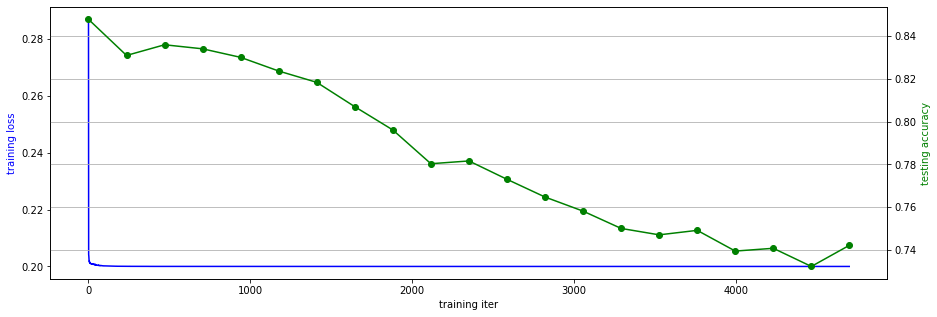

In [12]:
import matplotlib.pyplot as plt

# your code here

# ==== SOLUTION ====
fig, ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twinx()
ax1.plot(range(len(loss_list_all)), loss_list_all, c='b', label='training loss')

idx_list_plot = [x[0] for x in accuracies_list]
accuracy_list_plot = [x[1]['precision_at_1'] for x in accuracies_list]
ax2.plot(idx_list_plot, accuracy_list_plot, 'g-o')

ax1.set_xlabel('training iter')
ax1.set_ylabel('training loss', color='b')
ax2.set_ylabel('testing accuracy', color='g')

plt.grid()
plt.show()

==== SOLUTION ====

![](images/q2b-2epoches.png)

![](images/q2b-2epoches.png)

**(c)** You will then test the trained model on image retrival task, to retrieve the nearest images for a few test query images. Run the following code and submit the results. Make sure results for >=2 samples are visible in your converted PDF submission. (2 points)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


query image


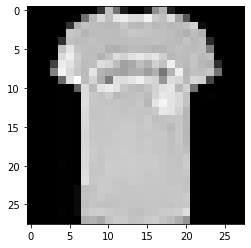

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


nearest images


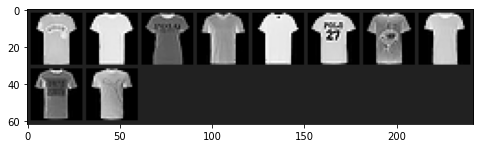

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


query image


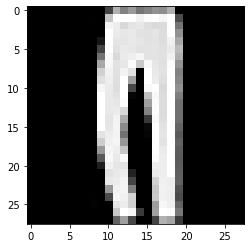

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


nearest images


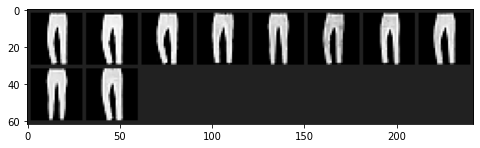

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


query image


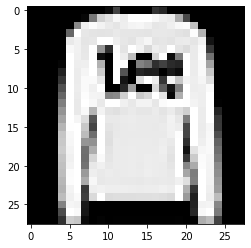

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


nearest images


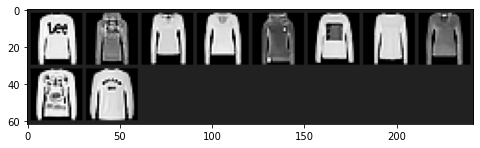

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


query image


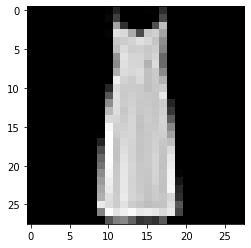

nearest images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


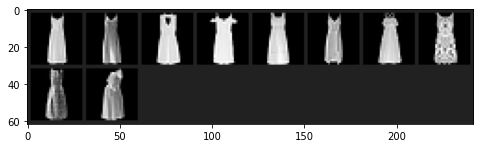

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


query image


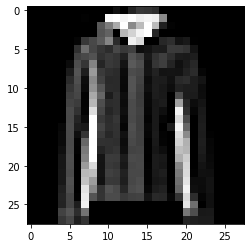

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


nearest images


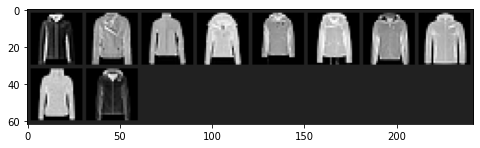

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


query image


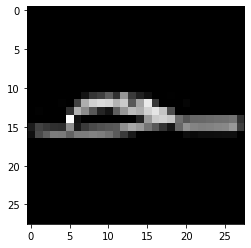

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


nearest images


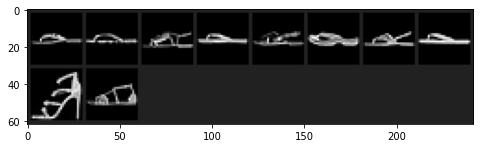

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


query image


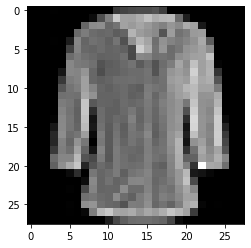

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


nearest images


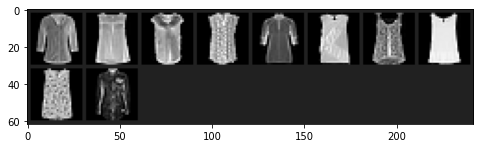

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


query image


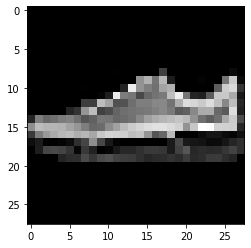

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


nearest images


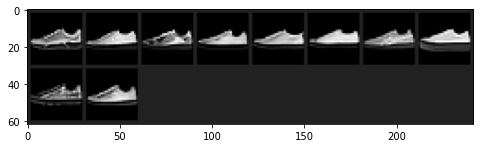

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


query image


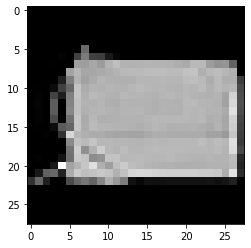

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


nearest images


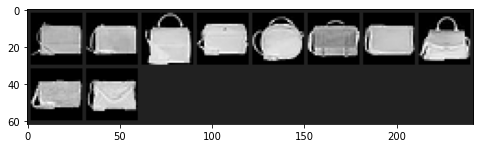

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


query image


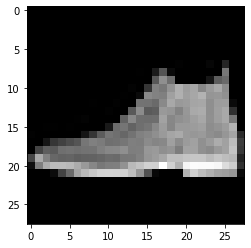

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


nearest images


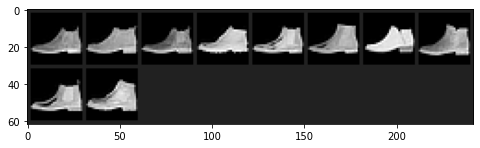

In [12]:
def print_decision(is_match):
    if is_match:
        print("Same class")
    else:
        print("Different class")

mean = [0.1307]
std = [0.3081]
inv_normalize = transforms.Normalize(
    mean=[-m / s for m, s in zip(mean, std)], std=[1 / s for s in std]
)

def imshow(img, figsize=(8, 4)):
    img = inv_normalize(img)
    npimg = img.numpy()
    plt.figure(figsize=figsize)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


THRESHOLD = 0.7
match_finder = MatchFinder(distance=CosineSimilarity(), threshold=THRESHOLD)
inference_model = InferenceModel(model, match_finder=match_finder)
labels_to_indices = c_f.get_labels_to_indices(dataset2.targets)


# get 10 nearest neighbors for an input image
inference_model.train_knn(dataset2)
for label in range(0, 10):
    img_type = labels_to_indices[label]
    img = dataset2[img_type[0]][0].unsqueeze(0)
    print("query image")
    imshow(torchvision.utils.make_grid(img))
    distances, indices = inference_model.get_nearest_neighbors(img, k=10)
    nearest_imgs = [dataset2[i][0] for i in indices.cpu()[0]]
    print("nearest images")
    imshow(torchvision.utils.make_grid(nearest_imgs))

**(d)** Tweak the pipeline, by
- Train for 20 epochs instead of 2;

Re-train the model. Plot the two curves again from (b) with the retrained model in the updated setting. (2 points)

`include the image here, by downloading  from the notebook and uploading it into the ./images folder, modify the path and run the block to reveal the image:`

Q2.1 (b) ==== SOLUTION ====

![](images/q2d-20epoches.png)

**(e)** Tweak the model by:

- Changing `self.conv1` to output 8 channels instead of 32; 
- Removing `self.conv2` and its activation function, and modify the input dimension of `self.fc1` from `9216` to some other number to make the layers fit together;
- Training for 20 epochs instead of 2;

1) Plot the curves (training losses and validation accuracies) again; (1 points)

2) Compare with the curves from (d): What difference can you observe between results (training losses and validation accuracies) of the two models? Hint: think about convergence rates, final value, etc. (2 points)

3) Explain how the change of model design lead to the observed differences. (5 points)
<!-- 2) Do you see `overfitting` with the newest model from (e)? If yes, can you explain what it is based on the comparison between (d) and (e), and what might be the cause of `overfitting`? -->

4) Copy the class of your new model in the code block below; (3 points)

1) `include the image here, by downloading from the notebook and uploading it into the ./images folder, modify the path and run the block to reveal the image:`

Q2.1 (e) ==== SOLUTION ====

![](images/q2e-20epoches.png)

2) `write your answer here`

==== SOLUTION ====

The new one-layer model has faster convergence and lower accuracy after 20 epoches. The accuracy quickly rise to around 0.855 and starts to saturate, to a point lower than the two-laye model (accuracy of 0.90).

3) `write your answer here`

==== SOLUTION ====

Mostly due to the reduced model capacity and number of paramaters of the one-layer model.

In [ ]:
4)
class Net(nn.Module):
# your code here

# ==== SOLUTION ====

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(1352, 128)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
#         print(x.shape)
        x = self.fc1(x)
        return x

**(f)** Change the margin of `losses.TripletMarginLoss` from 0.2 to 10, and re-train the ORIGINAL model (without the modification in (e)) for 2 epochs. 

1) Report the final test accuracy;  (2 points)

2) Compare with (a): what and why is the difference? (5 points)

1) `write your answer here`

==== SOLUTION ====

0.768900

2) `write your answer here`

The final accuracy is reduced, potentially because the larger margin makes the model and latent feature space more difficult to optimize.

**(g)** Change the miner property to `type_of_triplets="hard"` (which is for hard nagetive mining instead of looking for semi-hard negative samples) and re-train the ORIGINAL model (without the modification in (e) and (f)) for 2 epochs.

1) Report the final test accuracy; (2 points)

2) Plot the curves again; (1 points)

3) Compare with (a): what and why is the difference? (5 points)

1) `write your answer here`

==== SOLUTION ====

0.742100

2) `include the image here, by downloading  from the notebook and uploading it into the ./images folder, modify the path and run the block to reveal the image:`

==== SOLUTION ====

![](images/q2g-20epoches.png)

3) `write your answer here`

The accuracy drops with the change to hard negative mining. The reason could be, hard negatives drive the loss towards drastic changes compared to semi-hard ones, creating less meaningful gradients, making the training harder and potentially stuck on bad local minimums.

# Reference
[1] DeTone, Daniel, Tomasz Malisiewicz, and Andrew Rabinovich. ["Superpoint: Self-supervised interest point detection and description."](http://openaccess.thecvf.com/content_cvpr_2018_workshops/papers/w9/DeTone_SuperPoint_Self-Supervised_Interest_CVPR_2018_paper.pdf) *Proceedings of the IEEE conference on computer vision and pattern recognition workshops*
. 2018.

[2] Choy, Christopher B., et al. ["Universal correspondence network."](https://proceedings.neurips.cc/paper/2016/file/b495ce63ede0f4efc9eec62cb947c162-Paper.pdf) *Advances in neural information processing systems*
 29 (2016).